<a href="https://colab.research.google.com/github/dstephenhaynes/DTSA5510/blob/main/DTSA5510_Final_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [2]:
# Define the URL of the file
url = 'https://raw.githubusercontent.com/dstephenhaynes/DTSA5510/main/movie_titles_metadata.txt'

# Fetch the file content from the URL
response = requests.get(url)
data = response.text

# Define the column names based on the data description
columns = ['movie_id', 'movie_title', 'movie_year', 'imdb_rating', 'imdb_id', 'genres']

# Initialize an empty list to hold the rows of the DataFrame
rows = []

# Read the data and parse each line
for line in data.splitlines():
    # Split the line by the delimiter
    fields = line.strip().split(' +++$+++ ')
    # Parse the genres field from string representation of list to actual list
    fields[-1] = eval(fields[-1])
    # Append the parsed fields to the rows list
    rows.append(fields)

# Create the DataFrame
movies = pd.DataFrame(rows, columns=columns)

# Display the first few rows of the DataFrame
print(movies.head())

# Optional: Save the DataFrame to a CSV file for easier inspection and reuse
movies.to_csv('movies.csv', index=False)


  movie_id                 movie_title movie_year imdb_rating imdb_id  \
0       m0  10 things i hate about you       1999        6.90   62847   
1       m1  1492: conquest of paradise       1992        6.20   10421   
2       m2                  15 minutes       2001        6.10   25854   
3       m3       2001: a space odyssey       1968        8.40  163227   
4       m4                     48 hrs.       1982        6.90   22289   

                                     genres  
0                         [comedy, romance]  
1    [adventure, biography, drama, history]  
2          [action, crime, drama, thriller]  
3              [adventure, mystery, sci-fi]  
4  [action, comedy, crime, drama, thriller]  


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     617 non-null    object
 1   movie_title  617 non-null    object
 2   movie_year   617 non-null    object
 3   imdb_rating  617 non-null    object
 4   imdb_id      617 non-null    object
 5   genres       617 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


In [4]:
# Define the URLs of the files
urls = [
    'https://raw.githubusercontent.com/dstephenhaynes/DTSA5510/main/movie_lines_1.txt',
    'https://raw.githubusercontent.com/dstephenhaynes/DTSA5510/main/movie_lines_2.txt'
]

# Initialize an empty list to hold the rows of the DataFrame
rows = []

# Define the column names based on the data description
columns = ['line_id', 'character_id', 'movie_id', 'character_name', 'dialogue']

# Fetch and process each file
for url in urls:
    response = requests.get(url)
    data = response.text

    # Read the data and parse each line
    for line in data.splitlines():
        # Split the line by the delimiter
        fields = line.strip().split(' +++$+++ ')
        # Append the parsed fields to the rows list
        rows.append(fields)

# Create the DataFrame
dialogue = pd.DataFrame(rows, columns=columns)

# Display the first few rows of the DataFrame
print(dialogue.head())

# Optional: Save the DataFrame to a CSV file for easier inspection and reuse
dialogue.to_csv('dialogue.csv', index=False)


  line_id character_id movie_id character_name      dialogue
0   L1045           u0       m0         BIANCA  They do not!
1   L1044           u2       m0        CAMERON   They do to!
2    L985           u0       m0         BIANCA    I hope so.
3    L984           u2       m0        CAMERON     She okay?
4    L925           u0       m0         BIANCA     Let's go.


In [5]:
dialogue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   line_id         304713 non-null  object
 1   character_id    304713 non-null  object
 2   movie_id        304713 non-null  object
 3   character_name  304713 non-null  object
 4   dialogue        304446 non-null  object
dtypes: object(5)
memory usage: 11.6+ MB


In [6]:
# Display entries with null values
null_dialogue = dialogue[dialogue.isnull().any(axis=1)]
print(null_dialogue)

        line_id character_id movie_id    character_name dialogue
538        L474           u5       m0       KAT +++$+++     None
5637     L24609         u224      m14     SYKES +++$+++     None
36526   L239088        u1125      m74    JANOSZ +++$+++     None
45298   L283548        u1356      m90     BRUCE +++$+++     None
49894   L303243        u1475     m100       JOE +++$+++     None
...         ...          ...      ...               ...      ...
289507  L624042        u8606     m583     VIXIS +++$+++     None
299552  L649938        u8876     m603    LASHER +++$+++     None
299714  L649416        u8879     m603   MICHAEL +++$+++     None
303350  L663421        u8980     m612  DREIBERG +++$+++     None
304605  L666160        u9020     m615      INGA +++$+++     None

[267 rows x 5 columns]


In [7]:
# Convert columns to appropriate data types
movies['movie_year'] = pd.to_numeric(movies['movie_year'], errors='coerce')
movies['imdb_rating'] = pd.to_numeric(movies['imdb_rating'], errors='coerce')
movies['imdb_id'] = pd.to_numeric(movies['imdb_id'], errors='coerce')

# Convert genres column to list if it's a string
movies['genres'] = movies['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Handle missing values in dialogue
dialogue['dialogue'] = dialogue['dialogue'].fillna('')  # Replace NaN dialogues with empty strings

# Display cleaned data information
print(movies.info())
print(dialogue.info())

# Display the first few rows of the cleaned DataFrames
print(movies.head())
print(dialogue.head())

# Optional: Save the cleaned DataFrames to CSV files for easier inspection and reuse
movies.to_csv('cleaned_movie_titles_metadata.csv', index=False)
dialogue.to_csv('cleaned_movie_lines.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     617 non-null    object 
 1   movie_title  617 non-null    object 
 2   movie_year   601 non-null    float64
 3   imdb_rating  617 non-null    float64
 4   imdb_id      617 non-null    int64  
 5   genres       617 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 29.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   line_id         304713 non-null  object
 1   character_id    304713 non-null  object
 2   movie_id        304713 non-null  object
 3   character_name  304713 non-null  object
 4   dialogue        304713 non-null  object
dtypes: object(5)
memory usage: 11.6+ MB
None
  movie_id           

       movie_id                 movie_title   movie_year  imdb_rating  \
count       617                         617   601.000000   617.000000   
unique      617                         617          NaN          NaN   
top          m0  10 things i hate about you          NaN          NaN   
freq          1                           1          NaN          NaN   
mean        NaN                         NaN  1988.347754     6.863857   
std         NaN                         NaN    16.678845     1.215233   
min         NaN                         NaN  1927.000000     2.500000   
25%         NaN                         NaN  1984.000000     6.200000   
50%         NaN                         NaN  1994.000000     7.000000   
75%         NaN                         NaN  1999.000000     7.800000   
max         NaN                         NaN  2010.000000     9.300000   

              imdb_id   genres  
count      617.000000      617  
unique            NaN      290  
top               NaN  [

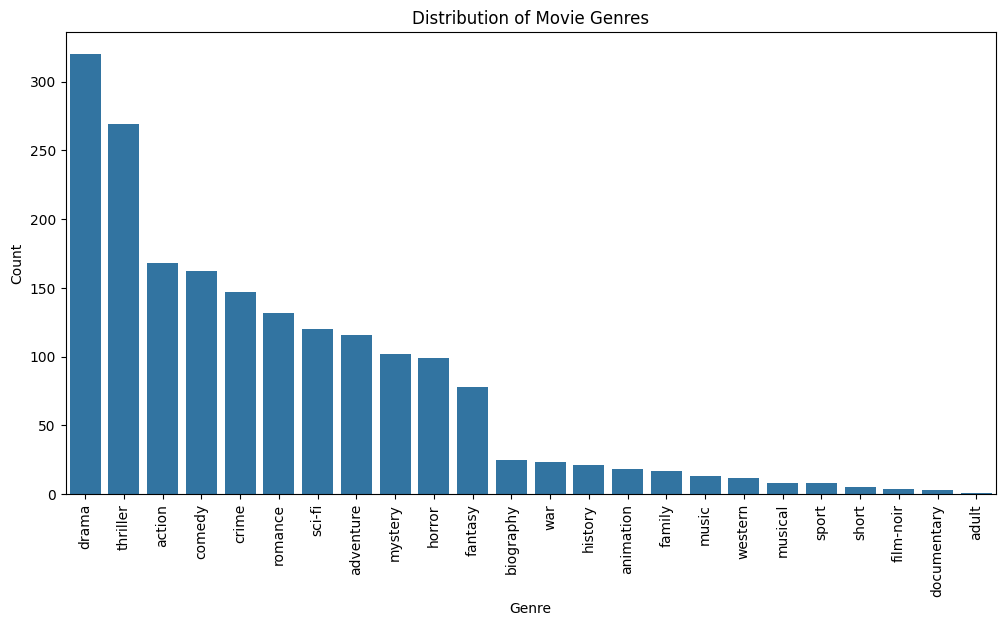

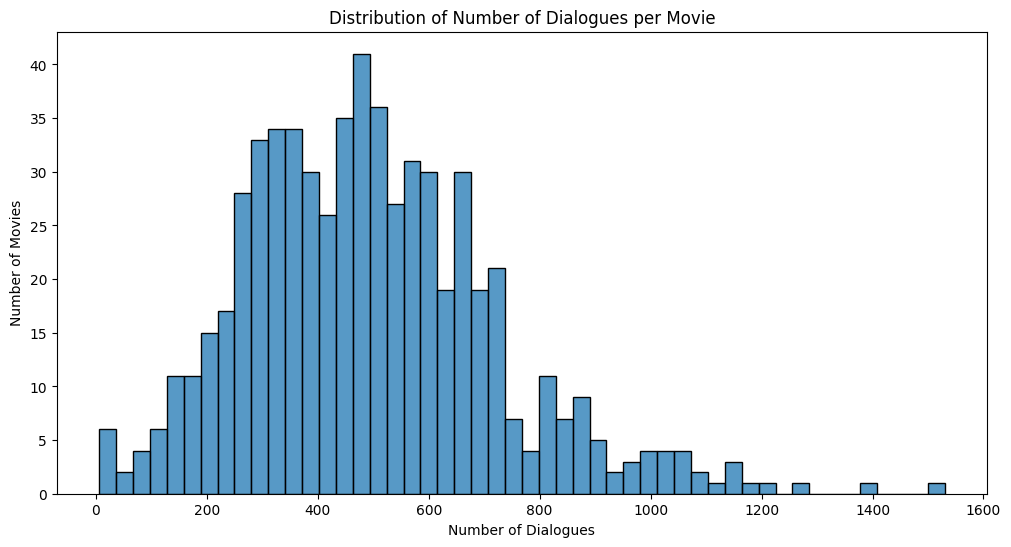

In [8]:
# Summary statistics
print(movies.describe(include='all'))
print(dialogue.describe(include='all'))

# Distribution of genres
all_genres = [genre for sublist in movies['genres'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Number of dialogues per movie
dialogues_per_movie = dialogue['movie_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(dialogues_per_movie, bins=50)
plt.title('Distribution of Number of Dialogues per Movie')
plt.xlabel('Number of Dialogues')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
# Combine dialogues for each movie
dialogue_combined = dialogue.groupby('movie_id')['dialogue'].apply(lambda x: ' '.join(x)).reset_index()

# Merge with movie metadata
movie_dialogues = movies.merge(dialogue_combined, on='movie_id', how='left')

# Text preprocessing and TF-IDF feature extraction
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(movie_dialogues['dialogue'].fillna(''))

# Perform PCA for dimensionality reduction (optional)
pca = PCA(n_components=50)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Add PCA components to DataFrame
for i in range(tfidf_pca.shape[1]):
    movie_dialogues[f'pca_component_{i+1}'] = tfidf_pca[:, i]

print(movie_dialogues.head())


  movie_id                 movie_title  movie_year  imdb_rating  imdb_id  \
0       m0  10 things i hate about you      1999.0          6.9    62847   
1       m1  1492: conquest of paradise      1992.0          6.2    10421   
2       m2                  15 minutes      2001.0          6.1    25854   
3       m3       2001: a space odyssey      1968.0          8.4   163227   
4       m4                     48 hrs.      1982.0          6.9    22289   

                                     genres  \
0                         [comedy, romance]   
1    [adventure, biography, drama, history]   
2          [action, crime, drama, thriller]   
3              [adventure, mystery, sci-fi]   
4  [action, comedy, crime, drama, thriller]   

                                            dialogue  pca_component_1  \
0  They do not! They do to! I hope so. She okay? ...        -0.206674   
1  Can't be that far, I say.  Also, I don't like ...         0.213208   
2  Officers, there's your killer, do your

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.03764033323468729


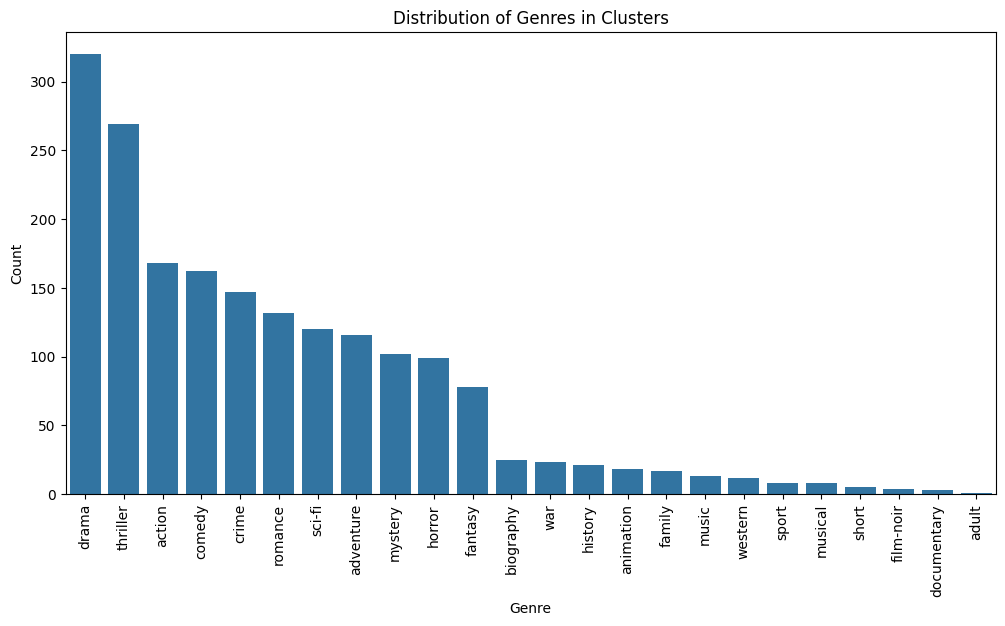

In [ ]:
# Select features for clustering
features = [f'pca_component_{i+1}' for i in range(tfidf_pca.shape[1])]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
movie_dialogues['cluster'] = kmeans.fit_predict(movie_dialogues[features])

# Evaluate clustering
silhouette_avg = silhouette_score(movie_dialogues[features], movie_dialogues['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Analyze clustering results
cluster_genres = movie_dialogues.groupby('cluster')['genres'].apply(lambda x: [genre for sublist in x for genre in sublist])
cluster_genre_counts = cluster_genres.apply(pd.Series).stack().reset_index(level=1, drop=True).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_genre_counts.index, y=cluster_genre_counts.values)
plt.title('Distribution of Genres in Clusters')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Add the cluster labels to the movie_dialogues DataFrame
movie_dialogues['cluster'] = kmeans.labels_

# Explore the genres within each cluster
for cluster in sorted(movie_dialogues['cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(movie_dialogues[movie_dialogues['cluster'] == cluster]['genres'].value_counts())
    print("\n")

# Example of displaying some movies in a cluster
for cluster in sorted(movie_dialogues['cluster'].unique()):
    print(f"Cluster {cluster} Example Movies:")
    print(movie_dialogues[movie_dialogues['cluster'] == cluster][['movie_title', 'genres']].head())
    print("\n")


Cluster 0:
genres
[drama, romance]                         2
[comedy, crime]                          1
[crime, drama, thriller]                 1
[comedy, drama, romance]                 1
[horror, sci-fi]                         1
[horror, mystery, thriller]              1
[documentary]                            1
[action, horror, thriller]               1
[drama]                                  1
[horror, mystery, sci-fi]                1
[comedy, drama]                          1
[crime, drama]                           1
[adventure, drama, romance, thriller]    1
[comedy, fantasy, horror]                1
Name: count, dtype: int64


Cluster 1:
genres
[drama]                                       8
[crime, drama, thriller]                      4
[crime, drama]                                2
[action, crime, drama, thriller]              2
[drama, romance]                              2
[crime, romance, thriller]                    2
[comedy, drama, fantasy, romance]             

In [ ]:
# Prepare dialogues for Word2Vec
dialogue_sentences = [dialogue.split() for dialogue in movie_dialogues['dialogue'].fillna('')]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=dialogue_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get Word2Vec features
def get_w2v_features(sentence, model, num_features):
    words = sentence.split()
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

w2v_features = np.array([get_w2v_features(dialogue, w2v_model, 100) for dialogue in movie_dialogues['dialogue'].fillna('')])

# Standardize the features
scaler = StandardScaler()
w2v_features_scaled = scaler.fit_transform(w2v_features)

# Apply PCA
pca = PCA(n_components=50)
w2v_pca = pca.fit_transform(w2v_features_scaled)

# Add PCA components to DataFrame
for i in range(w2v_pca.shape[1]):
    movie_dialogues[f'w2v_pca_component_{i+1}'] = w2v_pca[:, i]

print(movie_dialogues.head())


In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Define a dictionary to store silhouette scores for each algorithm
silhouette_scores = {}

# Initialize K-Means
kmeans = KMeans(n_clusters=5)
kmeans_clusters = kmeans.fit_predict(w2v_pca)
silhouette_scores['K-Means'] = silhouette_score(w2v_pca, kmeans_clusters)

# Initialize DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(w2v_pca)

# Check if more than one cluster is formed
if len(set(dbscan_clusters)) > 1:
    silhouette_scores['DBSCAN'] = silhouette_score(w2v_pca, dbscan_clusters)
else:
    silhouette_scores['DBSCAN'] = -1  # Assign a placeholder value if only one cluster is formed

# Initialize Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_clusters = agg_cluster.fit_predict(w2v_pca)
silhouette_scores['Agglomerative'] = silhouette_score(w2v_pca, agg_clusters)

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
gmm_clusters = gmm.fit_predict(w2v_pca)
silhouette_scores['GMM'] = silhouette_score(w2v_pca, gmm_clusters)

# Print silhouette scores
for method, score in silhouette_scores.items():
    print(f"Silhouette Score for {method}: {score}")

# Determine the best method
best_method = max(silhouette_scores, key=silhouette_scores.get)
print(f"The best performing method is: {best_method} with a silhouette score of {silhouette_scores[best_method]}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means: 0.0880148708820343
Silhouette Score for DBSCAN: -1
Silhouette Score for Agglomerative: 0.06238078698515892
Silhouette Score for GMM: 0.0766773670911789
The best performing method is: K-Means with a silhouette score of 0.0880148708820343


In [ ]:
# Filtered data
filtered_data = movie_dialogues.dropna(subset=['pca_component_1', 'pca_component_2'])  # Drop rows with NaN values in PCA components

# Select features for clustering
features = [f'pca_component_{i}' for i in range(1, 51)]  # Select PCA components as features

# Define a range of parameters for DBSCAN
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

# Iterate through different parameters
for eps, min_samples in product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_clusters = dbscan.fit_predict(filtered_data[features])

    # Only calculate silhouette score if there is more than one cluster
    if len(set(dbscan_clusters)) > 1:
        from sklearn.metrics import silhouette_score
        silhouette_avg = silhouette_score(filtered_data[features], dbscan_clusters)
        print(f'Silhouette Score for DBSCAN with eps={eps}, min_samples={min_samples}: {silhouette_avg}')


Silhouette Score for DBSCAN with eps=0.5, min_samples=5: 0.186076651586048
Silhouette Score for DBSCAN with eps=0.5, min_samples=10: 0.18057281329350053
Silhouette Score for DBSCAN with eps=0.5, min_samples=15: 0.17503874906000755


In [ ]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict clusters
dbscan_clusters = dbscan.fit_predict(w2v_pca)


In [ ]:
# Add cluster labels to DataFrame
movie_dialogues['dbscan_cluster'] = dbscan_clusters

# Display the first few rows of the DataFrame with cluster labels
print(movie_dialogues[['dialogue', 'dbscan_cluster']].head())


                                            dialogue  dbscan_cluster
0  They do not! They do to! I hope so. She okay? ...              -1
1  Can't be that far, I say.  Also, I don't like ...              -1
2  Officers, there's your killer, do your duty, a...              -1
3  We're trying to get there. I hope we can. CONT...              -1
4  Great, just great. That we do. And we put air ...              -1


<ipython-input-66-c4c42a888610>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movie_dialogues['dbscan_cluster'] = dbscan_clusters


In [ ]:
movie_dialogues.head()

,movie_id,movie_title,movie_year,imdb_rating,imdb_id,genres,dialogue,pca_component_1,pca_component_2,pca_component_3,...,w2v_pca_component_42,w2v_pca_component_43,w2v_pca_component_44,w2v_pca_component_45,w2v_pca_component_46,w2v_pca_component_47,w2v_pca_component_48,w2v_pca_component_49,w2v_pca_component_50,dbscan_cluster
0,m0,10 things i hate about you,1999.0,6.9,62847,"[comedy, romance]",They do not! They do to! I hope so. She okay? ...,-0.206674,-0.072830,-0.008089,...,-0.385556,0.075363,-0.555540,-0.154239,0.034575,0.004301,-0.431172,0.354726,-0.180947,-1
1,m1,1492: conquest of paradise,1992.0,6.2,10421,"[adventure, biography, drama, history]","Can't be that far, I say. Also, I don't like ...",0.213208,-0.062116,-0.005412,...,-0.394395,-0.015749,0.006408,0.309459,-0.437278,-0.171068,-0.437751,-0.042646,-0.168414,-1
2,m2,15 minutes,2001.0,6.1,25854,"[action, crime, drama, thriller]","Officers, there's your killer, do your duty, a...",-0.197520,0.041277,0.028659,...,0.560396,-0.150999,0.263758,-0.043427,0.075151,0.183902,-0.010461,-0.016181,-0.119143,-1
3,m3,2001: a space odyssey,1968.0,8.4,163227,"[adventure, mystery, sci-fi]",We're trying to get there. I hope we can. CONT...,0.177217,-0.160603,-0.020645,...,0.202561,0.766202,0.645400,0.140661,-0.669615,0.290510,0.026654,-0.040057,-0.348008,-1
4,m4,48 hrs.,1982.0,6.9,22289,"[action, comedy, crime, drama, thriller]","Great, just great. That we do. And we put air ...",-0.277790,0.225916,0.131614,...,-0.115017,-0.021305,0.136753,-0.355431,0.006474,0.016746,-0.098934,-0.059712,-0.158723,-1


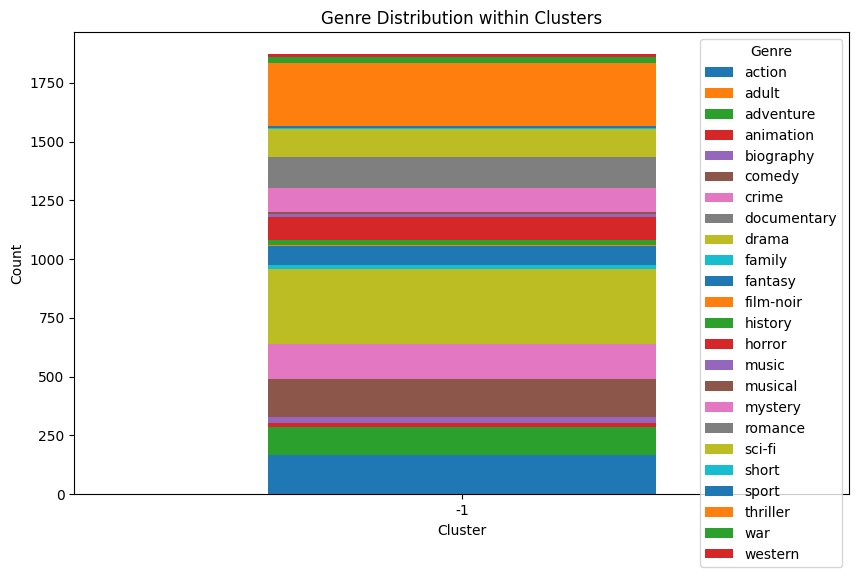

In [ ]:
# Explode the 'genres' column to convert lists into separate rows
exploded_data = movie_dialogues.explode('genres')

# Group by DBSCAN cluster and genre, count occurrences
cluster_genre_counts = exploded_data.groupby(['dbscan_cluster', 'genres']).size().reset_index(name='count')

# Pivot the table to have genres as columns
cluster_genre_pivot = cluster_genre_counts.pivot(index='dbscan_cluster', columns='genres', values='count').fillna(0)

# Plot the genre distribution for each cluster
cluster_genre_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Genre Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Genre')
plt.show()


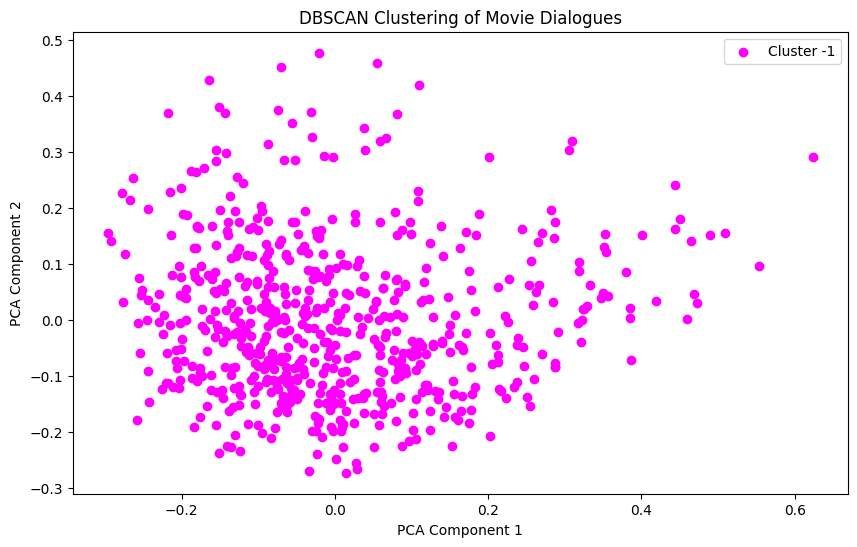

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each cluster
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta']

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in movie_dialogues['dbscan_cluster'].unique():
    cluster_data = movie_dialogues[movie_dialogues['dbscan_cluster'] == cluster_id]
    plt.scatter(cluster_data['pca_component_1'], cluster_data['pca_component_2'], c=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id}')

plt.title('DBSCAN Clustering of Movie Dialogues')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
